In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load  train and test dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [4]:
test.shape

(23490, 13)

In [5]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [6]:
test.duplicated().any()

False

In [7]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [8]:
train.shape

(54808, 14)

In [9]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
train.duplicated().any()

False

In [11]:
# for data cleaning combine both test and train data together
df = pd.concat([test.assign(ind="test"), train.assign(ind="train")])

In [12]:
df.shape

(78298, 15)

In [13]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'ind', 'is_promoted'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 54807
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  ind                   78298 non-null  object 
 14  is_promoted           54808 non-null  float64
dtypes: float64(2), int6

In [15]:
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
ind                         0
is_promoted             23490
dtype: int64

In [16]:
df.duplicated().any()

False

<Figure size 720x720 with 0 Axes>

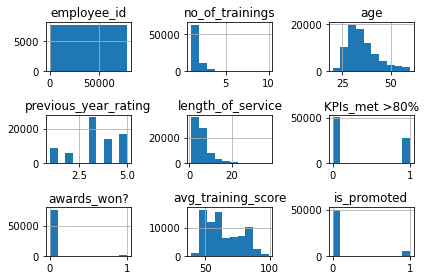

In [17]:
plt.figure(figsize=(10,10))
df.hist()
plt.tight_layout()
plt.show()

In [18]:
#handling missing values

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64


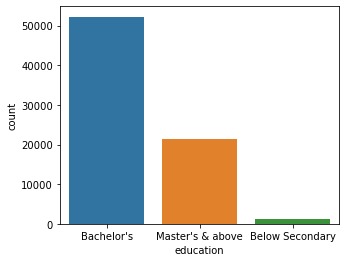

In [19]:
print(df['education'].value_counts())
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='education')
plt.show()

In [20]:
#missing values in 'education' is filled using forward fill
df['education']=df['education'].ffill(axis=0)
df['education'].isna().sum()

0

In [21]:
df['education'].value_counts()

Bachelor's          54701
Master's & above    22368
Below Secondary      1229
Name: education, dtype: int64

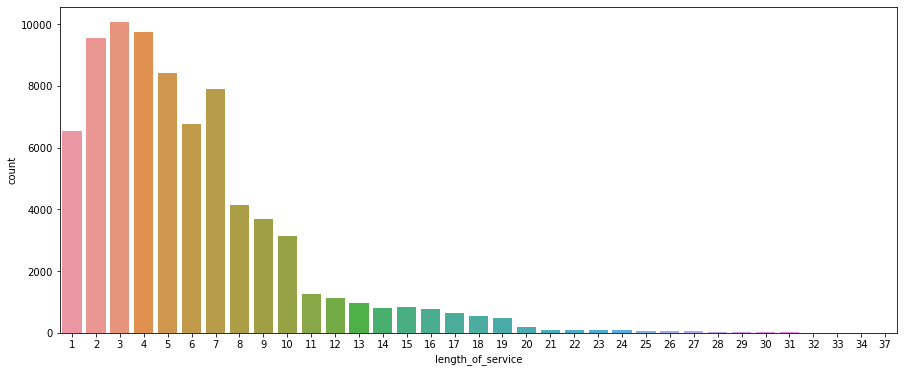

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='length_of_service')
plt.show()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64


<AxesSubplot:xlabel='previous_year_rating', ylabel='Density'>

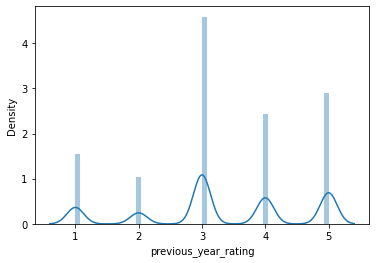

In [23]:
print(df['previous_year_rating'].value_counts())
sns.distplot(df['previous_year_rating'])

In [24]:
df.groupby(['length_of_service'])['previous_year_rating'].median()

length_of_service
1     3.0
2     3.0
3     3.0
4     3.0
5     3.0
6     3.0
7     3.0
8     3.0
9     3.0
10    3.0
11    3.0
12    3.0
13    3.0
14    3.0
15    3.0
16    3.0
17    3.0
18    3.0
19    3.0
20    3.0
21    3.0
22    3.0
23    3.0
24    3.0
25    3.0
26    3.0
27    3.0
28    3.0
29    3.0
30    3.5
31    3.0
32    3.0
33    3.0
34    3.0
37    5.0
Name: previous_year_rating, dtype: float64

In [25]:
#missing values can be filled with median for each class
df['previous_year_rating'] = df['previous_year_rating'].fillna(df.groupby('length_of_service')['previous_year_rating'].transform('median'))

In [26]:
df['previous_year_rating'].isna().sum()

0

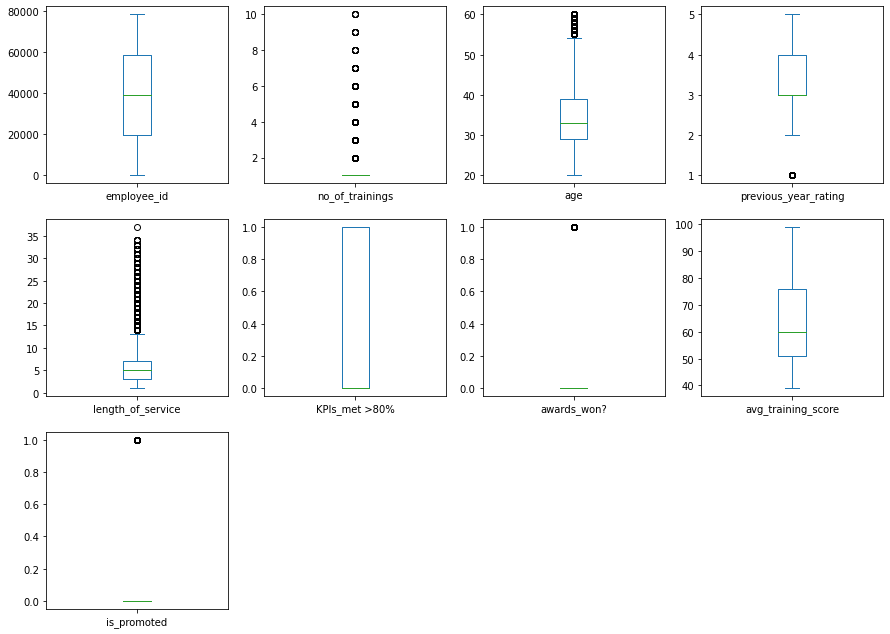

In [27]:
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

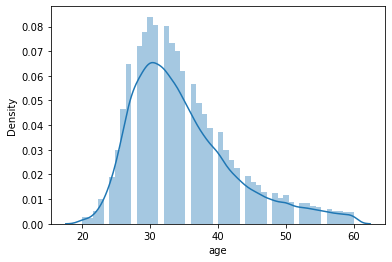

In [28]:
#it is seen that most of the employees are in the age range between 20-40 who will be waiting for promotion
sns.distplot(df['age'])

In [29]:
#converting categorical columns to numerical
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['department','region','gender','recruitment_channel']:
    df[i]=le.fit_transform(df[i])

In [30]:
scale_mapper = {"Below Secondary":0, "Bachelor's":1, "Master's & above":2}
df["education"] = df["education"].replace(scale_mapper)

In [31]:
df['education'].value_counts()

1    54701
2    22368
0     1229
Name: education, dtype: int64

In [32]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,ind,is_promoted
0,8724,8,18,1,1,2,1,24,3.0,1,1,0,77,test,NaN
1,74430,2,28,1,0,0,1,31,3.0,5,0,0,51,test,NaN
2,72255,7,4,1,1,0,1,31,1.0,4,0,0,47,test,NaN
3,38562,5,11,1,0,0,3,31,2.0,9,0,0,65,test,NaN
4,64486,1,21,1,1,2,1,30,4.0,7,0,0,61,test,NaN


In [33]:
#seperating test and train data back
test, train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]

In [34]:
train=train.drop(['ind'],axis=1)
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0.0
1,65141,4,14,1,1,0,1,30,5.0,4,0,0,60,0.0
2,7513,7,10,1,1,2,1,34,3.0,7,0,0,50,0.0
3,2542,7,15,1,1,0,2,39,1.0,10,0,0,50,0.0
4,48945,8,18,1,1,0,1,45,3.0,2,0,0,73,0.0


In [35]:
test=test.drop(['ind','is_promoted'],axis=1)
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,1,1,2,1,24,3.0,1,1,0,77
1,74430,2,28,1,0,0,1,31,3.0,5,0,0,51
2,72255,7,4,1,1,0,1,31,1.0,4,0,0,47
3,38562,5,11,1,0,0,3,31,2.0,9,0,0,65
4,64486,1,21,1,1,2,1,30,4.0,7,0,0,61


In [36]:
train.describe()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,4.972796,15.428970,1.268939,0.702379,0.868158,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,2.506046,8.764954,0.476687,0.457216,0.980713,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,4.000000,11.000000,1.000000,0.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,5.000000,14.000000,1.000000,1.000000,0.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,7.000000,21.000000,2.000000,1.000000,2.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,8.000000,33.000000,2.000000,1.000000,2.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


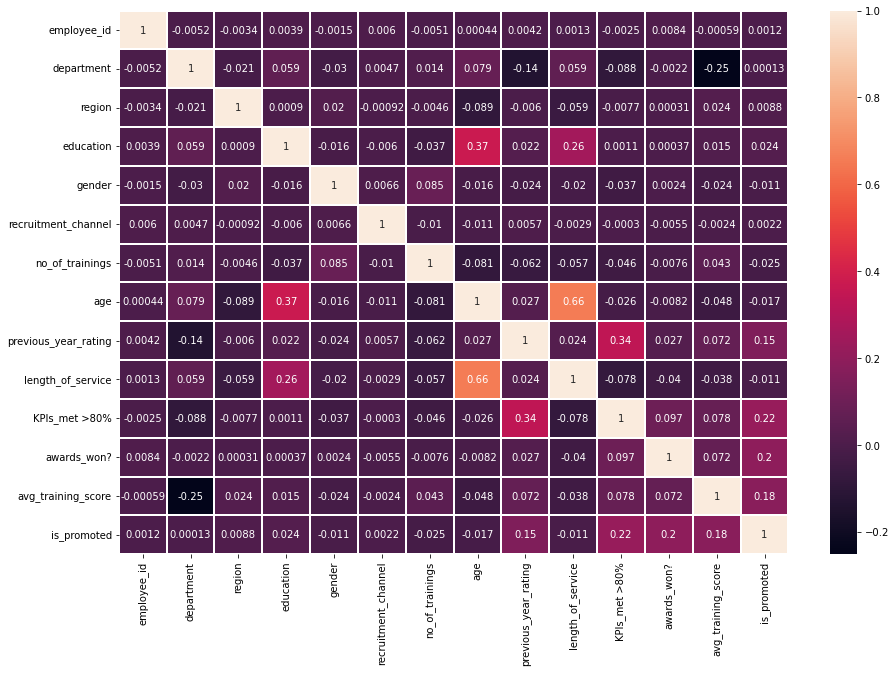

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True,linewidth=.2)
plt.show()

In [38]:
X=train.drop(['is_promoted'],axis=1)
y=train['is_promoted']

In [39]:
#Robust scaling
from sklearn.preprocessing import RobustScaler
rs= RobustScaler()
X=rs.fit_transform(X)

In [40]:
#splitting dataset(train and validation)
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2 , random_state=42)

In [41]:
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix

### Logistic regression

In [42]:

from sklearn.linear_model import LogisticRegression

logit_model=LogisticRegression()
logit_model.fit(X_train, y_train) 
y_pred=logit_model.predict(X_valid)
print(classification_report(y_valid,y_pred))
print(confusion_matrix(y_valid,y_pred))
print("f1 score is: ",f1_score(y_valid,y_pred,pos_label='positive',average='micro'))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     10054
         1.0       0.66      0.07      0.12       908

    accuracy                           0.92     10962
   macro avg       0.79      0.53      0.54     10962
weighted avg       0.90      0.92      0.89     10962

[[10022    32]
 [  847    61]]
f1 score is:  0.9198139025725233


### Decision tree

In [43]:

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_valid)
print(classification_report(y_valid,y_pred))
print(confusion_matrix(y_valid,y_pred))
print("f1 score is: ",f1_score(y_valid,y_pred,pos_label='positive',average='micro'))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     10054
         1.0       0.94      0.07      0.13       908

    accuracy                           0.92     10962
   macro avg       0.93      0.54      0.55     10962
weighted avg       0.92      0.92      0.89     10962

[[10050     4]
 [  844    64]]
f1 score is:  0.9226418536763364


### kNN

In [44]:

from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(6,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_valid)
    acc=accuracy_score(y_valid,y_pred)
    acc_values.append(acc)

In [45]:
acc_values

[0.9173508483853311,
 0.9173508483853311,
 0.9174420726144864,
 0.9174420726144864,
 0.9186279875935048,
 0.918354314906039,
 0.9187192118226601,
 0.9184455391351943,
 0.9186279875935048]

Text(0, 0.5, 'accuracy')

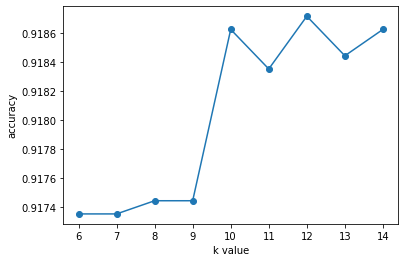

In [46]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [47]:
#giving k value as 12
classifier=KNeighborsClassifier(n_neighbors=12,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_valid)
print("f1 score is: ",f1_score(y_valid,y_pred,pos_label='positive',average='micro'))
confusion_matrix(y_valid,y_pred)

f1 score is:  0.9187192118226601


array([[10042,    12],
       [  879,    29]], dtype=int64)

### Random Forest

In [48]:

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_valid)
print("f1 score is: ",f1_score(y_valid,y_pred,pos_label='positive',average='micro'))
confusion_matrix(y_valid,y_pred)


f1 score is:  0.9374201787994891


array([[10031,    23],
       [  663,   245]], dtype=int64)

### svc

In [49]:

from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_valid)
print("f1 score is: ",f1_score(y_valid,y_pred,pos_label='positive',average='micro'))
confusion_matrix(y_valid,y_pred)

f1 score is:  0.9217296113847839


array([[10043,    11],
       [  847,    61]], dtype=int64)

### Naive bayes classifier
### Gaussian

In [50]:

from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_valid)
print("f1 score is: ",f1_score(y_valid,y_pred,pos_label='positive',average='micro'))
confusion_matrix(y_valid,y_pred)

f1 score is:  0.9150702426564495


array([[9915,  139],
       [ 792,  116]], dtype=int64)

### Bernoulli

In [51]:

from sklearn.naive_bayes import BernoulliNB
classifier= BernoulliNB()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_valid)
print("f1 score is: ",f1_score(y_valid,y_pred,pos_label='positive',average='micro'))
confusion_matrix(y_valid,y_pred)

f1 score is:  0.9165298303229337


array([[9987,   67],
       [ 848,   60]], dtype=int64)

### lightgbm

In [52]:

import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier()
lgb_clf.fit(X_train, y_train)

y_pred=lgb_clf.predict(X_valid)
print("f1 score is: ",f1_score(y_valid,y_pred,pos_label='positive',average='micro'))
confusion_matrix(y_valid,y_pred)

f1 score is:  0.9433497536945813


array([[10025,    29],
       [  592,   316]], dtype=int64)

### hyperparameter tuning -lightgbm

In [53]:
lgb_clf = lgb.LGBMClassifier(num_leaves =300,n_estimators=460,max_depth=4,learning_rate=0.1,boosting_type = 'dart')
lgb_clf.fit(X_train, y_train)

y_pred=lgb_clf.predict(X_valid)
print("f1 score is: ",f1_score(y_valid,y_pred,pos_label='positive',average='micro'))
confusion_matrix(y_valid,y_pred)

f1 score is:  0.9423462871738734


array([[10041,    13],
       [  619,   289]], dtype=int64)

### xg boost

In [54]:

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_valid)
print("f1 score is: ",f1_score(y_valid,y_pred,pos_label='positive',average='micro'))
confusion_matrix(y_valid,y_pred)

f1 score is:  0.9400656814449918


array([[10042,    12],
       [  645,   263]], dtype=int64)

### hyperparameter tuning - xg boost

In [55]:
clf = GradientBoostingClassifier(learning_rate =0.1,n_estimators=460,max_depth=4,subsample = 0.80)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_valid)
print("f1 score is: ",f1_score(y_valid,y_pred,pos_label='positive',average='micro'))
confusion_matrix(y_valid,y_pred)

f1 score is:  0.9428024083196497


array([[10028,    26],
       [  601,   307]], dtype=int64)

### catboost

In [56]:
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier(iterations=500)
cat_clf.fit(X_train, y_train)
y_pred=cat_clf.predict(X_valid)
print("f1 score is: ",f1_score(y_valid,y_pred,pos_label='positive',average='micro'))
confusion_matrix(y_valid,y_pred)

Learning rate set to 0.097742
0:	learn: 0.5862146	total: 69.7ms	remaining: 34.8s
1:	learn: 0.5089223	total: 86ms	remaining: 21.4s
2:	learn: 0.4430726	total: 102ms	remaining: 17s
3:	learn: 0.3984837	total: 119ms	remaining: 14.7s
4:	learn: 0.3484997	total: 135ms	remaining: 13.4s
5:	learn: 0.3271614	total: 152ms	remaining: 12.5s
6:	learn: 0.3033194	total: 171ms	remaining: 12s
7:	learn: 0.2891869	total: 199ms	remaining: 12.3s
8:	learn: 0.2792995	total: 217ms	remaining: 11.8s
9:	learn: 0.2650142	total: 233ms	remaining: 11.4s
10:	learn: 0.2525924	total: 251ms	remaining: 11.1s
11:	learn: 0.2483746	total: 266ms	remaining: 10.8s
12:	learn: 0.2443608	total: 284ms	remaining: 10.6s
13:	learn: 0.2386391	total: 301ms	remaining: 10.4s
14:	learn: 0.2356869	total: 319ms	remaining: 10.3s
15:	learn: 0.2324867	total: 347ms	remaining: 10.5s
16:	learn: 0.2224674	total: 365ms	remaining: 10.4s
17:	learn: 0.2193799	total: 382ms	remaining: 10.2s
18:	learn: 0.2165531	total: 399ms	remaining: 10.1s
19:	learn: 0.20

array([[10028,    26],
       [  589,   319]], dtype=int64)

### hyperparameter tuning-catboost

In [58]:
cat_clf = CatBoostClassifier(learning_rate=0.1,subsample=0.75,max_depth=5,n_estimators=494)
cat_clf.fit(X_train, y_train)
y_pred=cat_clf.predict(X_valid)
print("f1 score is: ",f1_score(y_valid,y_pred,pos_label='positive',average='micro'))
confusion_matrix(y_valid,y_pred)

0:	learn: 0.5839422	total: 14.3ms	remaining: 7.03s
1:	learn: 0.5057252	total: 25.8ms	remaining: 6.34s
2:	learn: 0.4354847	total: 38.6ms	remaining: 6.31s
3:	learn: 0.3954987	total: 50.4ms	remaining: 6.18s
4:	learn: 0.3569123	total: 62.3ms	remaining: 6.09s
5:	learn: 0.3286979	total: 75.5ms	remaining: 6.14s
6:	learn: 0.3108448	total: 88.3ms	remaining: 6.14s
7:	learn: 0.2903104	total: 100ms	remaining: 6.08s
8:	learn: 0.2711885	total: 111ms	remaining: 6.01s
9:	learn: 0.2622445	total: 123ms	remaining: 5.96s
10:	learn: 0.2563313	total: 137ms	remaining: 6.02s
11:	learn: 0.2514949	total: 149ms	remaining: 5.98s
12:	learn: 0.2438823	total: 160ms	remaining: 5.92s
13:	learn: 0.2368517	total: 174ms	remaining: 5.96s
14:	learn: 0.2346750	total: 186ms	remaining: 5.93s
15:	learn: 0.2277210	total: 201ms	remaining: 6.01s
16:	learn: 0.2237541	total: 224ms	remaining: 6.28s
17:	learn: 0.2207363	total: 237ms	remaining: 6.28s
18:	learn: 0.2198218	total: 250ms	remaining: 6.25s
19:	learn: 0.2170816	total: 262ms	

array([[10030,    24],
       [  600,   308]], dtype=int64)

In [59]:
from sklearn.ensemble import VotingClassifier
estimator = []
estimator.append(('xg',GradientBoostingClassifier(learning_rate =0.1,n_estimators=460,max_depth=4,subsample = 0.80)))
estimator.append(('lgb', lgb.LGBMClassifier(num_leaves =300,n_estimators=460,max_depth=5,learning_rate=0.2,boosting_type = 'dart')))
estimator.append(('cb',CatBoostClassifier(learning_rate=0.15,subsample=0.75,max_depth=5,n_estimators=494)))  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_valid)
  
score = f1_score(y_valid, y_pred)
print("Hard Voting Score % d" % score)
  
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
y_pred = vot_soft.predict(X_valid)
  
score = f1_score(y_valid, y_pred)
print("Soft Voting Score % d" % score)

0:	learn: 0.5367491	total: 21ms	remaining: 10.4s
1:	learn: 0.4404616	total: 31.7ms	remaining: 7.8s
2:	learn: 0.3777459	total: 44.2ms	remaining: 7.24s
3:	learn: 0.3383280	total: 56.5ms	remaining: 6.92s
4:	learn: 0.3039143	total: 69.1ms	remaining: 6.76s
5:	learn: 0.2705711	total: 80.2ms	remaining: 6.52s
6:	learn: 0.2577779	total: 93ms	remaining: 6.47s
7:	learn: 0.2510510	total: 106ms	remaining: 6.42s
8:	learn: 0.2350146	total: 120ms	remaining: 6.46s
9:	learn: 0.2296560	total: 131ms	remaining: 6.32s
10:	learn: 0.2252568	total: 143ms	remaining: 6.26s
11:	learn: 0.2225070	total: 155ms	remaining: 6.23s
12:	learn: 0.2195593	total: 169ms	remaining: 6.25s
13:	learn: 0.2161659	total: 181ms	remaining: 6.21s
14:	learn: 0.2115564	total: 192ms	remaining: 6.13s
15:	learn: 0.2083257	total: 207ms	remaining: 6.2s
16:	learn: 0.2072065	total: 224ms	remaining: 6.27s
17:	learn: 0.2001136	total: 240ms	remaining: 6.35s
18:	learn: 0.1992895	total: 252ms	remaining: 6.31s
19:	learn: 0.1981866	total: 266ms	remain

In [60]:
# here f1 score is high for catboost after hypertuning so will use that model to predict the promotions
prediction=test
y_pred=cat_clf.predict(prediction)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [61]:
test['is_promoted']=y_pred
test['is_promoted']=test['is_promoted'].astype(int)
data=test.iloc[:, [0,-1]]
data.head()

,employee_id,is_promoted
0,8724,1
1,74430,1
2,72255,1
3,38562,1
4,64486,1


In [62]:
data['is_promoted'].value_counts()

1    23490
Name: is_promoted, dtype: int64

In [63]:
data.to_csv('results.csv', index = False)